<a href="https://colab.research.google.com/github/N-avi-N/Mask-RCNN/blob/master/Mask_RCNN_colab_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Mask RCNN folder from git

In [14]:
!git clone https://github.com/matterport/Mask_RCNN

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


## Load Libraries using the requirements file
*   Update the **Tensorflow** and **Keras** libraries to prevent 
compatibility issues
* tensorflow==1.13.1
* keras==2.2.4






In [ ]:
#tensorflow==1.13.1
#keras==2.2.4
!pip install -r 'Mask_RCNN/requirements.txt'

### Import the code folder, and load as a Python library 

In [ ]:
!cd Mask_RCNN ; python setup.py install

## Check the Mask RCNN library correctly installed

In [ ]:
!pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Requires: 
Required-by: 


In [23]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle

In [17]:
import os 
os.chdir('Mask_RCNN/samples')

In [18]:
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

... done downloading pretrained model!


In [19]:
# define the test configuration file
class TestConfig(Config):
    NAME = 'test'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 80 + 1 # +1 for the background

In [20]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [21]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=TestConfig())

In [22]:
# load pre-trained coco model weights
rcnn.load_weights(COCO_MODEL_PATH, by_name=True)

In [24]:
path = '../images/8829708882_48f263491e_z.jpg'
img = skimage.io.imread(path)

In [25]:
# load photograph
img = load_img('../images/8829708882_48f263491e_z.jpg')
img = img_to_array(img)

In [26]:
# make prediction
results = rcnn.detect([img], verbose=0)

In [32]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

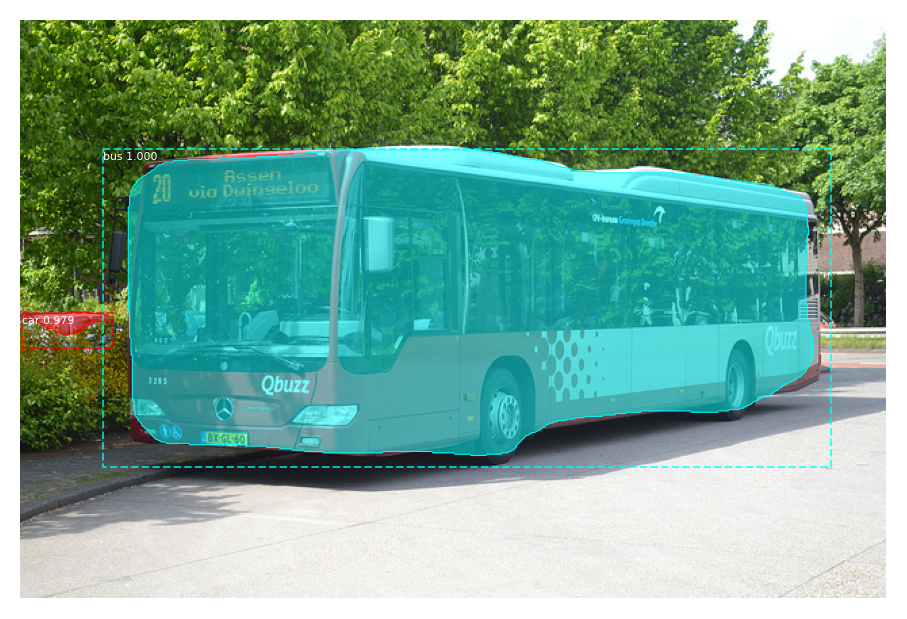

In [36]:
# visualize the results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

## Plot just the bounding boxes

In [42]:
# Define function to draw rectangles on the image objects
def draw_image_with_boxes(filename, boxes_list):

    # load the image
    data = pyplot.imread(filename)

    # plot the image
    pyplot.imshow(data)

    # get context for drawing boxes
    ax = pyplot.gca()

    # iterate and plot each box
    for box in boxes_list:

        # get coordinates of each box
        y1, x1, y2, x2 = box

        # calculate width and height of each box
        width, height = x2 - x1, y2 - y1

        # create box shape
        rect = Rectangle((x1, y1), width, height, fill = False, color = 'red')

        # draw the box
        ax.add_patch(rect)

    # show the image
    pyplot.show()

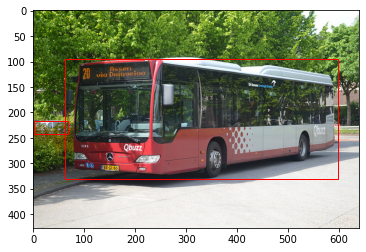

In [43]:
# visualize the box

path = '../images/8829708882_48f263491e_z.jpg'
#image = skimage.io.imread(path)
#draw_image_with_boxes('../images/8829708882_48f263491e_z.jpg', results[0]['rois'])
#r = results[0]

draw_image_with_boxes(path, results[0]['rois'])